## Observations and Insights 

In [435]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single datase
study_resultsdf = pd.DataFrame(study_results)
mouse_metadatadf = pd.DataFrame(mouse_metadata)
mstudy_df = pd.merge(study_resultsdf, mouse_metadatadf, on="Mouse ID", how="outer")
mstudy_df.head(10)

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0     b128          0           45.000000                 0    Capomulin   
1     b128          5           45.651331                 0    Capomulin   
2     b128         10           43.270852                 0    Capomulin   
3     b128         15           43.784893                 0    Capomulin   
4     b128         20           42.731552                 0    Capomulin   
5     b128         25           43.262145                 1    Capomulin   
6     b128         30           40.605335                 1    Capomulin   
7     b128         35           37.967644                 1    Capomulin   
8     b128         40           38.379726                 2    Capomulin   
9     b128         45           38.982878                 2    Capomulin   

      Sex  Age_months  Weight (g)  
0  Female           9          22  
1  Female           9          22  
2  Female           9          22  
3  Female           9          22  
4  Female           9          22  
5  Female           9          22  
6  Female           9          22  
7  Female           9          22  
8  Female           9          22  
9  Female           9          22

In [436]:
drug_reg_index = mstudy_df.set_index("Drug Regimen")
drug_reg_index



abc=drug_reg_index.loc['Naftisol']
yt = abc['Timepoint'].value_counts()
yt




0     25
5     23
15    21
10    21
20    20
25    18
40    15
35    15
30    15
45    13
Name: Timepoint, dtype: int64

In [437]:
# Checking the number of mice in the DataFrame.
mouse_counter =mstudy_df['Mouse ID'].value_counts()
mouse_count =mouse_counter.count()
mouse_count
 

249

In [438]:

x_axis_build= mstudy_df.drop_duplicates(['Timepoint'])
x_axis = x_axis_build["Timepoint"]
x_axis


0     0
1     5
2    10
3    15
4    20
5    25
6    30
7    35
8    40
9    45
Name: Timepoint, dtype: int64

In [439]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

timepoint_counter =mstudy_df['Timepoint'].value_counts()
mouse_counter


g989    13
f345    10
c302    10
a520    10
y793    10
        ..
h428     1
b447     1
l872     1
n482     1
u153     1
Name: Mouse ID, Length: 249, dtype: int64

In [440]:
timepoint_counter_df =pd.DataFrame(timepoint_counter)
timepoint_counter_df.columns = ["Mice"]
timepoint_counter_df["Mice"]


0     250
5     238
10    223
15    207
20    195
25    183
30    171
35    154
40    142
45    130
Name: Mice, dtype: int64

In [441]:
# Optional: Get all the data for the duplicate mouse ID. 
mstudy_df_drugs=mstudy_df.drop_duplicates(["Drug Regimen"])
drug_treatments=mstudy_df_drugs['Drug Regimen']
drug_treatments

0       Capomulin
10       Ketapril
63       Naftisol
213     Infubinol
428      Stelasyn
436      Ramicane
860      Propriva
908     Zoniferol
1100      Placebo
1304     Ceftamin
Name: Drug Regimen, dtype: object

In [442]:
mice_by_treatment = {
    
    
}

for x in drug_treatments:
    

    abc=drug_reg_index.loc[x]
    yt = abc['Timepoint'].value_counts()
    mice_by_treatment.update({x:yt})
    
mice_treatment_df= pd.DataFrame(mice_by_treatment)
mice_treatment_df

mice_better=mice_treatment_df.iloc[0:11:2]
mice_better.sort_index(ascending=False)


Capomulin  Ketapril  Naftisol  Infubinol  Stelasyn  Ramicane  Propriva  \
40         21        15        15         10        12        20         9   
30         22        18        15         17        17        23        13   
20         23        19        20         20        19        23        17   
10         25        22        21         21        21        24        23   
0          25        25        25         25        24        25        26   

    Zoniferol  Placebo  Ceftamin  
40         14       12        14  
30         15       15        16  
20         17       19        18  
10         22       24        20  
0          25       25        25

In [443]:
for x in drug_treatments:
    print(x)

Capomulin
Ketapril
Naftisol
Infubinol
Stelasyn
Ramicane
Propriva
Zoniferol
Placebo
Ceftamin


In [444]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mstudy_df= mstudy_df.drop_duplicates(["Mouse ID"], keep ='last')
clean_mstudy_df

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
9        b128         45           38.982878                 2    Capomulin   
10       f932          0           45.000000                 0     Ketapril   
18       g107         35           71.905117                 0     Ketapril   
21       a457         10           49.783419                 0     Ketapril   
30       c819         40           62.175705                 1     Ketapril   
...       ...        ...                 ...               ...          ...   
1857     t565         45           34.455298                 0    Capomulin   
1867     i557         45           47.685963                 1    Capomulin   
1877     m957         45           33.329098                 1    Capomulin   
1882     f966         20           30.485985                 0    Capomulin   
1892     m601         45           28.430964                 1    Capomulin   

         Sex  Age_months  Weight (g)  
9     Female           9          22  
10      Male          15          29  
18    Female           2          29  
21    Female          11          30  
30      Male          21          25  
...      ...         ...         ...  
1857  Female          20          17  
1867  Female           1          24  
1877  Female           3          19  
1882    Male          16          17  
1892    Male          22          17  

[249 rows x 8 columns]

In [445]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_count=clean_mstudy_df['Mouse ID'].value_counts()
mice=clean_mouse_count.count()

print(f' The total number of mice in the study is {mice}')

 The total number of mice in the study is 249


## Summary Statistics

In [446]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_mstudy_df = clean_mstudy_df.set_index('Drug Regimen')

groupby_drug=drug_mstudy_df.groupby(["Drug Regimen"])

#groupby_drug = clean_mstudy_df.set_index('Drug Regimen')
tumorv_mean=groupby_drug['Tumor Volume (mm3)'].mean()
tumorv_mean
tumorv_median = groupby_drug['Tumor Volume (mm3)'].median()
tumorv_median
tumorv_std = groupby_drug['Tumor Volume (mm3)'].std()
tumorv_std 
tumorv_var = groupby_drug['Tumor Volume (mm3)'].var()
tumorv_var
tumorv_sem = groupby_drug['Tumor Volume (mm3)'].sum()
tumorv_sem 
tumorv_sum = groupby_drug['Tumor Volume (mm3)'].sum()
tumorv_sum

summary_stats = {
"Mean": tumorv_mean,
"Median": tumorv_median,
"Standard Deviation": tumorv_std,
"Variance": tumorv_var,
"SEM": tumorv_sem

}
summary_stats_df = pd.DataFrame(summary_stats)
summary_stats_df
# This method is the most straighforward, creating multiple series and putting them all together at the end.

Mean     Median  Standard Deviation    Variance  \
Drug Regimen                                                         
Capomulin     36.667568  38.125164            5.715188   32.663378   
Ceftamin      57.753977  59.851956            8.365568   69.982735   
Infubinol     58.178246  60.165180            8.602957   74.010875   
Ketapril      62.806191  64.487812            9.945920   98.921330   
Naftisol      61.205757  63.283288           10.297083  106.029927   
Placebo       60.508414  62.030594            8.874672   78.759797   
Propriva      56.736964  55.841410            8.327605   69.349002   
Ramicane      36.191390  36.561652            5.671539   32.166354   
Stelasyn      61.001707  62.192350            9.504293   90.331586   
Zoniferol     59.181258  61.840058            8.767099   76.862027   

                      SEM  
Drug Regimen               
Capomulin      916.689193  
Ceftamin      1443.849421  
Infubinol     1454.456145  
Ketapril      1570.154786  
Naftisol      1530.143925  
Placebo       1512.710359  
Propriva      1418.424091  
Ramicane       904.784761  
Stelasyn      1464.040958  
Zoniferol     1479.531445

In [447]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_stats_df

Mean     Median  Standard Deviation    Variance  \
Drug Regimen                                                         
Capomulin     36.667568  38.125164            5.715188   32.663378   
Ceftamin      57.753977  59.851956            8.365568   69.982735   
Infubinol     58.178246  60.165180            8.602957   74.010875   
Ketapril      62.806191  64.487812            9.945920   98.921330   
Naftisol      61.205757  63.283288           10.297083  106.029927   
Placebo       60.508414  62.030594            8.874672   78.759797   
Propriva      56.736964  55.841410            8.327605   69.349002   
Ramicane      36.191390  36.561652            5.671539   32.166354   
Stelasyn      61.001707  62.192350            9.504293   90.331586   
Zoniferol     59.181258  61.840058            8.767099   76.862027   

                      SEM  
Drug Regimen               
Capomulin      916.689193  
Ceftamin      1443.849421  
Infubinol     1454.456145  
Ketapril      1570.154786  
Naftisol      1530.143925  
Placebo       1512.710359  
Propriva      1418.424091  
Ramicane       904.784761  
Stelasyn      1464.040958  
Zoniferol     1479.531445

## Bar Plots

[(6, 28),
 Text(0, 0.5, 'Count of Mice'),
 Text(0.5, 0, 'Days'),
 Text(0.5, 1.0, 'Drug Treatment')]

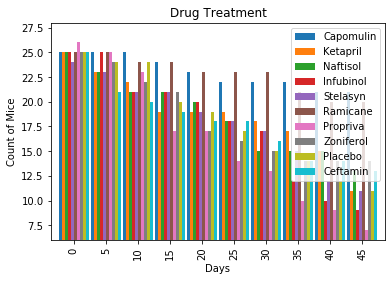

In [448]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas. 

mice_chart=mice_treatment_df.plot(kind="bar", width = .95 )

mice_chart.set(ylim=[6, 28], xlabel='Days', ylabel='Count of Mice',
       title='Drug Treatment')


[Text(0, 0.5, 'Treatment Days'),
 (6, 27),
 Text(0.5, 0, 'Count of Mice'),
 Text(0.5, 1.0, 'Results by Drug Treatment')]

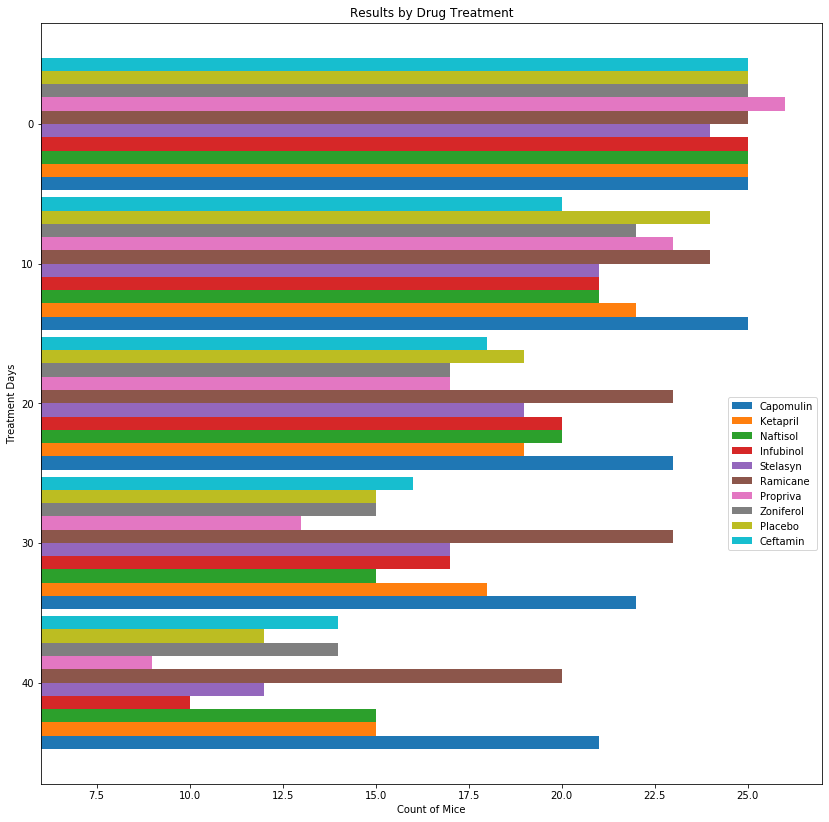

In [449]:
 
mice_chart=mice_better.sort_index(ascending=False).plot(kind="barh", width = .95, figsize=(14,14) )
plt.legend(loc="best", bbox_to_anchor=(.5, .3,.5,.5))
mice_chart.set(xlim=[6, 27], xlabel='Count of Mice', ylabel='Treatment Days',
       title='Results by Drug Treatment')


In [450]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.

## Pie Plots

([<matplotlib.patches.Wedge at 0x1c069537ac8>,
 [Text(-0.0069391759767656585, 1.0999781124353174, 'Male'),
  Text(0.006939175976765524, -1.0999781124353174, 'Female')])

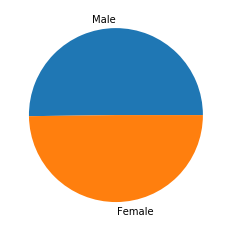

In [451]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
count_by_sex =clean_mstudy_df['Sex'].value_counts()
labels = ["Male","Female"]
plt.pie(count_by_sex, labels = labels )

In [452]:
count_by_sex

Male      125
Female    124
Name: Sex, dtype: int64

([<matplotlib.patches.Wedge at 0x1c06a8bea88>,
 [Text(-0.0069391759767656585, 1.0999781124353174, 'Male'),
  Text(0.006939175976765524, -1.0999781124353174, 'Female')])

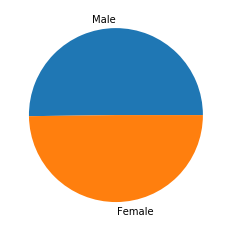

In [453]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(count_by_sex, labels = labels )

## Quartiles, Outliers and Boxplots

In [480]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
best_treatment = summary_stats_df.sort_values(by="Mean")
top_four=best_treatment.iloc[0:4]
top_four

Mean     Median  Standard Deviation   Variance          SEM
Drug Regimen                                                                  
Ramicane      36.191390  36.561652            5.671539  32.166354   904.784761
Capomulin     36.667568  38.125164            5.715188  32.663378   916.689193
Propriva      56.736964  55.841410            8.327605  69.349002  1418.424091
Ceftamin      57.753977  59.851956            8.365568  69.982735  1443.849421

[Text(0, 0.5, 'Total Tumor Volume'),
 (-0.5, 3.5),
 Text(0.5, 0, 'Drug Regimen'),
 Text(0.5, 1.0, 'Top 4 Treatments')]

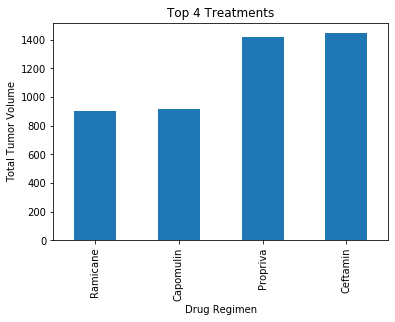

In [455]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

four_best_chart = top_four["SEM"].plot(kind="bar")
four_best_chart.set(xlim=[-.5, 3.5], xlabel='Drug Regimen', ylabel='Total Tumor Volume',
       title='Top 4 Treatments')

In [481]:
top_four_filter = clean_mstudy_df.iloc

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
9        b128         45           38.982878                 2    Capomulin   
10       f932          0           45.000000                 0     Ketapril   
18       g107         35           71.905117                 0     Ketapril   
21       a457         10           49.783419                 0     Ketapril   
30       c819         40           62.175705                 1     Ketapril   
...       ...        ...                 ...               ...          ...   
1857     t565         45           34.455298                 0    Capomulin   
1867     i557         45           47.685963                 1    Capomulin   
1877     m957         45           33.329098                 1    Capomulin   
1882     f966         20           30.485985                 0    Capomulin   
1892     m601         45           28.430964                 1    Capomulin   

         Sex  Age_months  Weight (g)  
9     Female           9          22  
10      Male          15          29  
18    Female           2          29  
21    Female          11          30  
30      Male          21          25  
...      ...         ...         ...  
1857  Female          20          17  
1867  Female           1          24  
1877  Female           3          19  
1882    Male          16          17  
1892    Male          22          17  

[249 rows x 8 columns]

## Line and Scatter Plots

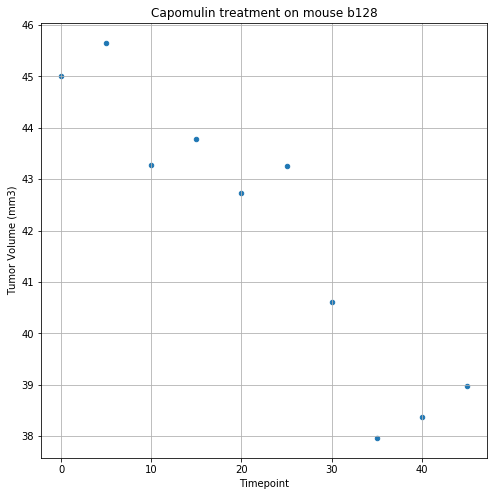

In [456]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
#b128


b128=mstudy_df.loc[mstudy_df['Mouse ID'] == 'b128']



b128.plot(kind="scatter", x="Timepoint", y="Tumor Volume (mm3)", grid=True, figsize=(8,8),
            title="Capomulin treatment on mouse b128")

In [457]:
b128

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0     b128          0           45.000000                 0    Capomulin   
1     b128          5           45.651331                 0    Capomulin   
2     b128         10           43.270852                 0    Capomulin   
3     b128         15           43.784893                 0    Capomulin   
4     b128         20           42.731552                 0    Capomulin   
5     b128         25           43.262145                 1    Capomulin   
6     b128         30           40.605335                 1    Capomulin   
7     b128         35           37.967644                 1    Capomulin   
8     b128         40           38.379726                 2    Capomulin   
9     b128         45           38.982878                 2    Capomulin   

      Sex  Age_months  Weight (g)  
0  Female           9          22  
1  Female           9          22  
2  Female           9          22  
3  Female           9          22  
4  Female           9          22  
5  Female           9          22  
6  Female           9          22  
7  Female           9          22  
8  Female           9          22  
9  Female           9          22

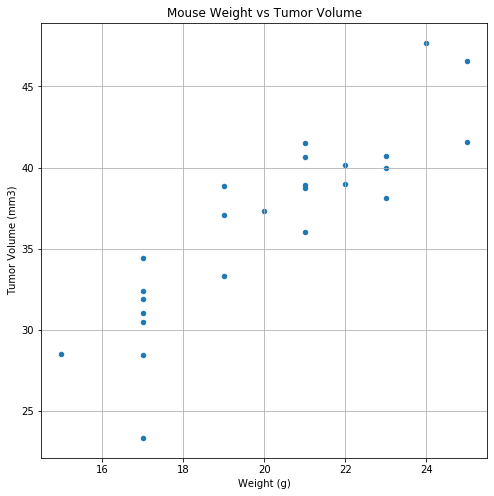

In [458]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_df=clean_mstudy_df.loc[clean_mstudy_df['Drug Regimen'] == "Capomulin"]
capomulin_df.plot(kind="scatter", x="Weight (g)", y="Tumor Volume (mm3)", grid=True, figsize=(8,8),
            title="Mouse Weight vs Tumor Volume")



In [459]:
capomulin_df

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
9        b128         45           38.982878                 2    Capomulin   
1680     j246         35           38.753265                 1    Capomulin   
1690     r554         45           32.377357                 3    Capomulin   
1700     s185         45           23.343598                 1    Capomulin   
1710     b742         45           38.939633                 0    Capomulin   
1720     x401         45           28.484033                 0    Capomulin   
1730     l509         45           41.483008                 3    Capomulin   
1740     s710         45           40.728578                 1    Capomulin   
1744     r157         15           46.539206                 0    Capomulin   
1754     u364         45           31.023923                 3    Capomulin   
1764     j119         45           38.125164                 1    Capomulin   
1774     v923         45           40.658124                 2    Capomulin   
1784     w914         45           36.041047                 2    Capomulin   
1794     i738         45           37.311846                 2    Capomulin   
1804     r944         45           41.581521                 2    Capomulin   
1814     y793         45           31.896238                 2    Capomulin   
1824     g316         45           40.159220                 2    Capomulin   
1834     g288         45           37.074024                 1    Capomulin   
1844     l897         45           38.846876                 1    Capomulin   
1847     w150         10           39.952347                 0    Capomulin   
1857     t565         45           34.455298                 0    Capomulin   
1867     i557         45           47.685963                 1    Capomulin   
1877     m957         45           33.329098                 1    Capomulin   
1882     f966         20           30.485985                 0    Capomulin   
1892     m601         45           28.430964                 1    Capomulin   

         Sex  Age_months  Weight (g)  
9     Female           9          22  
1680  Female          21          21  
1690  Female           8          17  
1700  Female           3          17  
1710    Male           7          21  
1720  Female          16          15  
1730    Male          17          21  
1740  Female           1          23  
1744    Male          22          25  
1754    Male          18          17  
1764  Female           7          23  
1774  Female          19          21  
1784    Male          24          21  
1794  Female          23          20  
1804    Male          12          25  
1814    Male          17          17  
1824  Female          22          22  
1834    Male           3          19  
1844    Male          17          19  
1847    Male          23          23  
1857  Female          20          17  
1867  Female           1          24  
1877  Female           3          19  
1882    Male          16          17  
1892    Male          22          17

In [460]:
weight = capomulin_df.iloc[:,7]
tumor_volume = capomulin_df.iloc[:,2]


## Correlation and Regression

In [472]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(weight ,tumor_volume)
print(f"The correlation of weight to tumor volume is {round(correlation[0],2)} using Capomulin")

The correlation of weight to tumor volume is 0.88 using Capomulin


The R-value is 0.8767060403658116


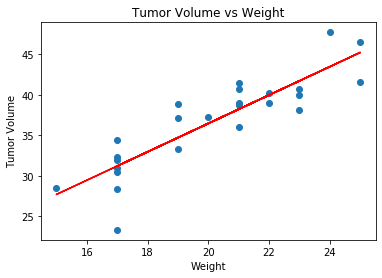

In [474]:
x_values = capomulin_df['Weight (g)']
y_values = capomulin_df['Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
regress_values 
plt.xlabel('Weight')
plt.ylabel('Tumor Volume')
plt.title("Tumor Volume vs Weight")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
print(f'The R-value is {rvalue}')

In [479]:
print('Three Observations from the data')
print('1 - Capomulin treatment on mouse b128 reduced the size of the tumor ')
print('2 - Propriva appears to be dangerous  ')
print('3 - Capomulin appears to be the best treatment ')

Three Observations from the data
1 - Capomulin treatment on mouse b128 reduced the size of the tumor 
2 - Propriva appears to be dangerous  
3 - Capomulin appears to be the best treatment 
